In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import missingno as msno
from sklearn.preprocessing import StandardScaler    
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# 0 Reading the Data

In [2]:
df = pd.read_excel('/content/drive/MyDrive/projects/maintenance/output_en.xlsx')

## 0.0 Checking for Duplicate Items

In [3]:
df.BN.duplicated().any()

False

## 0.1 Data Head

In [ ]:
df.head()

,BN,TOF,AF,DS,feeder,RC,TOP,Relay,COB,PD,COP,DFB,CFB,DOFDB,PS,STOLP,EENS
0,88644,A,A,A,A,0.177419,A,A,A,NaN,NaN,1398/01/01 06:54,1398/01/01 06:59,5,NaN,NaN,0.010946
1,88645,A,B,B,B,0.145161,A,A,B,B,B,1398/01/01 07:15,1398/01/01 07:17,2,NaN,NaN,0.003127
2,88648,A,A,C,C,0.032258,A,A,C,NaN,NaN,1398/01/01 12:03,1398/01/01 12:45,42,NaN,NaN,0.016419
3,88657,A,A,A,D,0.048387,A,A,D,C,C,1398/01/02 01:20,1398/01/02 02:25,65,1398/01/02 08:15,415.0,0.039093
4,88664,A,C,D,A,0.161290,A,B,E,D,D,1398/01/02 16:26,1398/01/02 16:50,24,1398/01/02 22:00,334.0,0.075059


## 0.2 Statistical Overview

In [ ]:
df.describe()

,BN,RC,DOFDB,STOLP,EENS
count,1649.000000,1649.000000,1649.000000,813.000000,1649.000000
mean,92292.196483,0.251114,95.322013,76.029520,0.057775
std,2417.036529,0.129460,1348.183057,83.711101,0.082273
min,88644.000000,0.000000,0.000000,0.000000,0.000000
25%,89966.000000,0.161290,5.000000,33.000000,0.013292
50%,92133.000000,0.225806,6.000000,51.000000,0.026583
75%,94520.000000,0.322581,26.000000,91.000000,0.072713
max,96349.000000,1.000000,47961.000000,1155.000000,1.000000


# 1 Visualizations 

## 1.0 Pair Plot Overview
**Note the outliers**

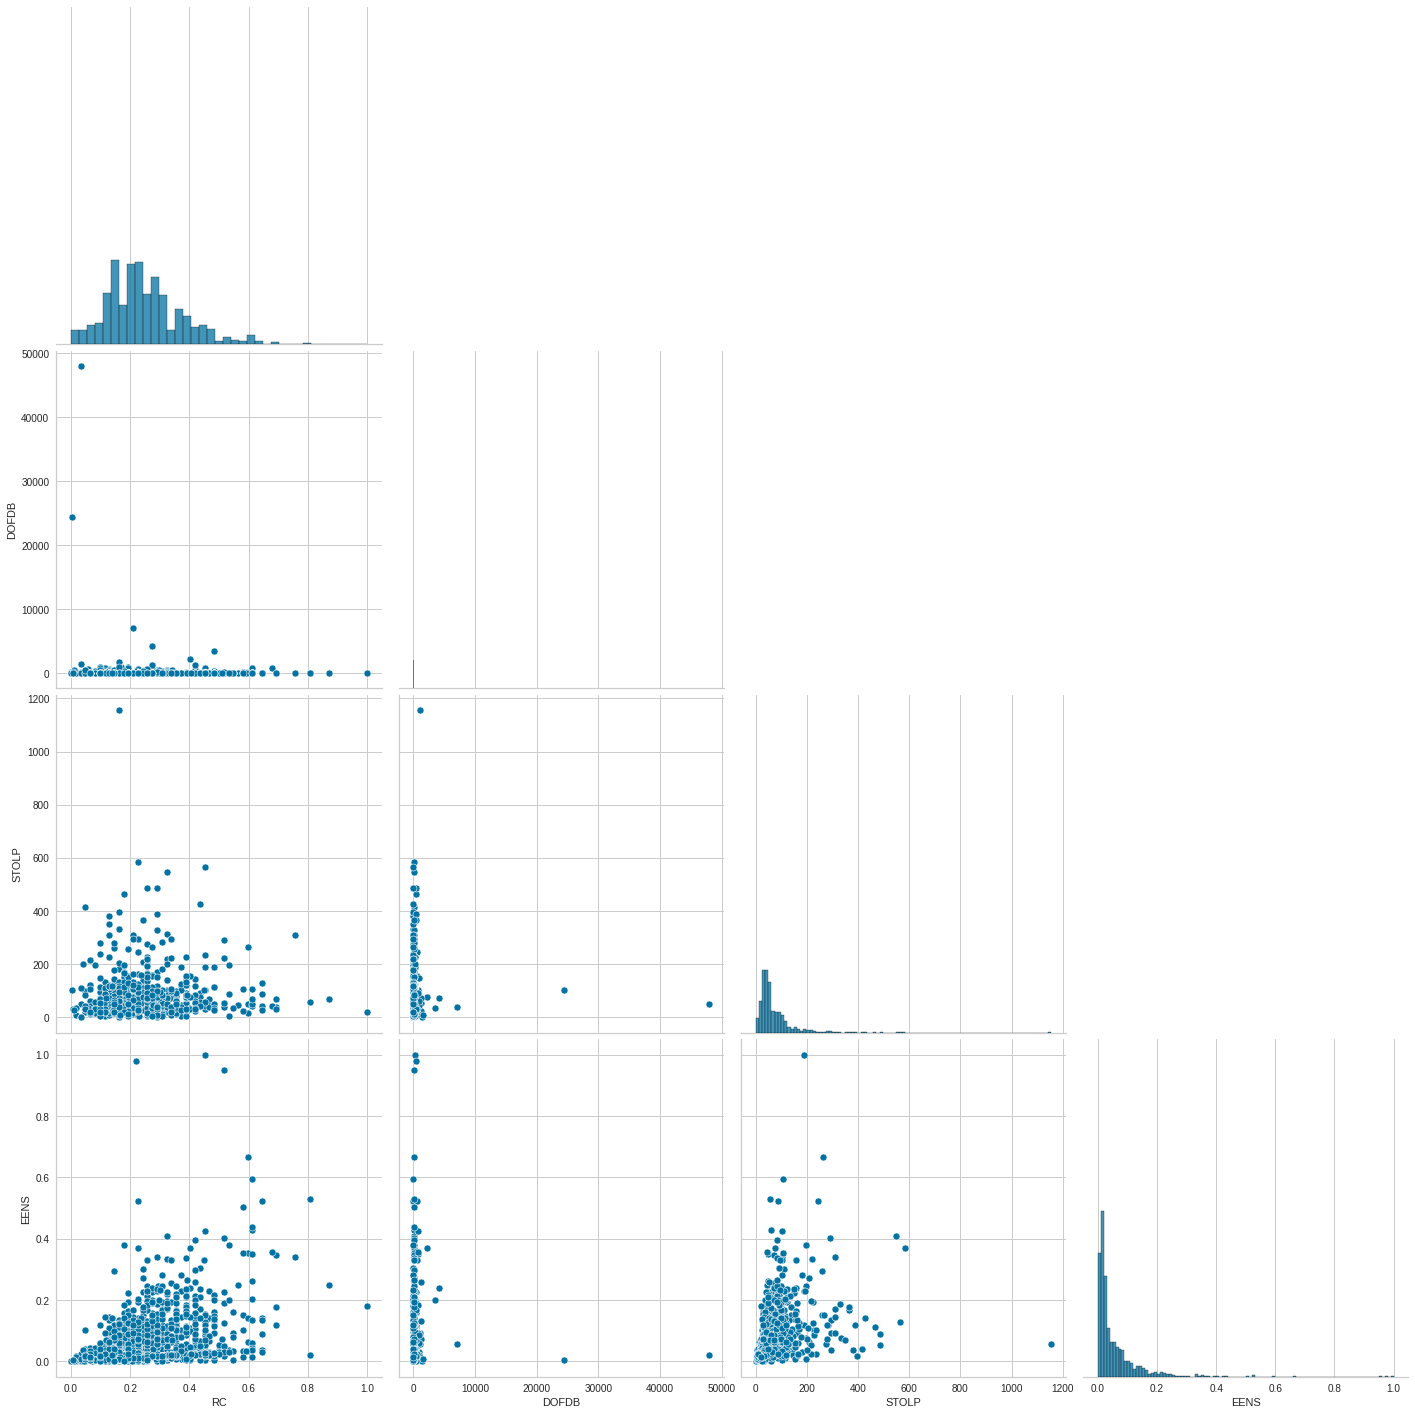

In [ ]:
sns.pairplot(df.drop('BN',1),corner=True,height=5)

## 1.1 Visualization of NAN Values

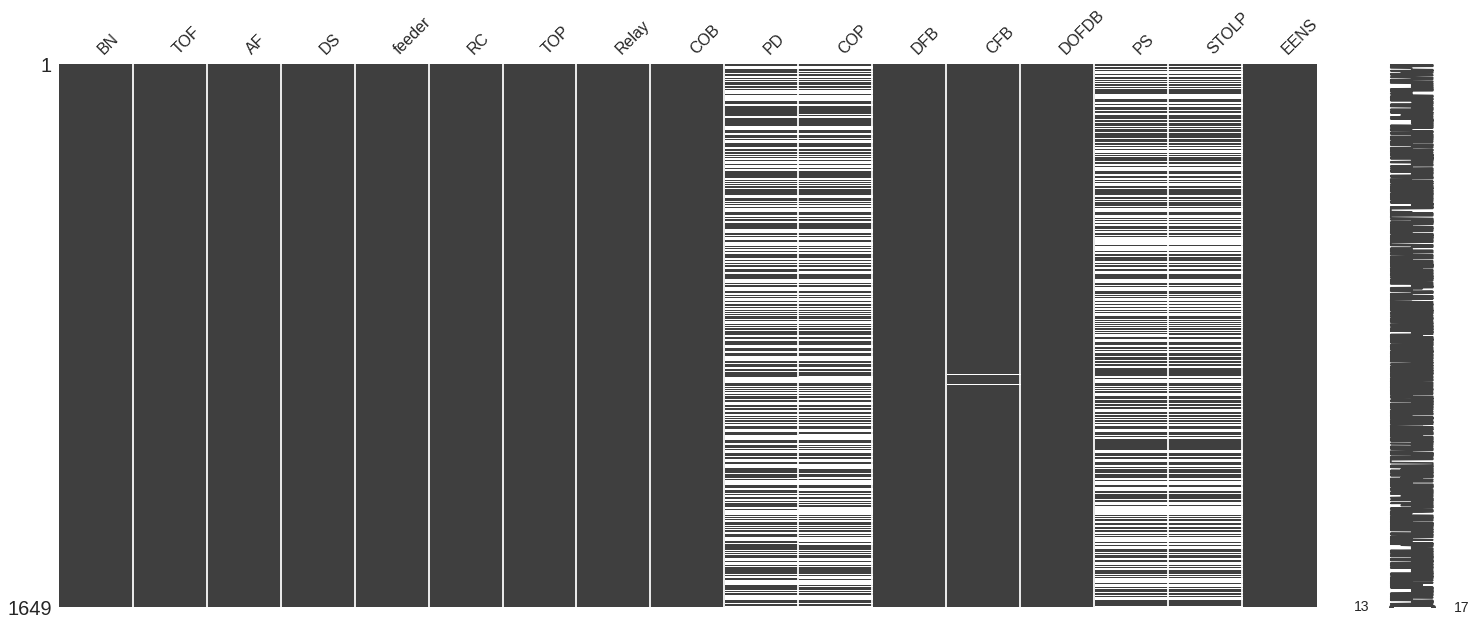

In [ ]:
msno.matrix(df) 

## 1.2 Missing Data Correlation
**Note the high correlations**

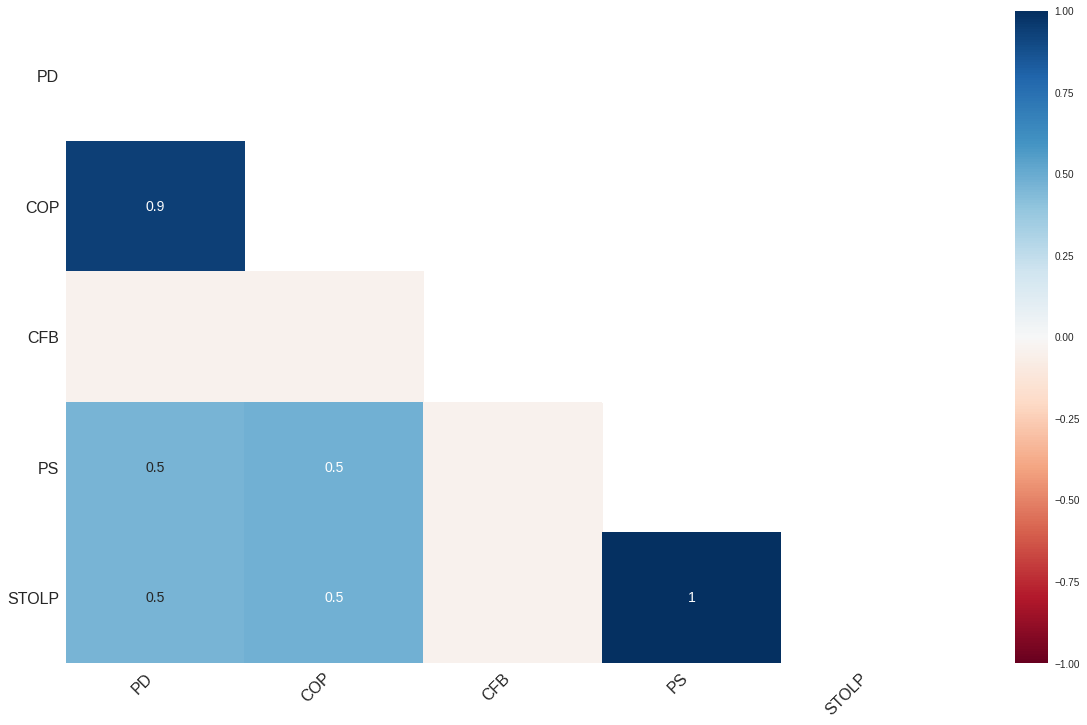

In [ ]:
msno.heatmap(df) 

# 2 Grouping by Other Variables

# 2.0.0 Grouping by Feeder

In [ ]:
grouppedby_feeder = df.groupby('feeder').sum().drop('BN',1)
grouppedby_feeder.head(5)

,RC,DOFDB,STOLP,EENS
feeder,,,,
A,53.380903,11049,9048.0,13.852228
B,11.940645,4445,2117.0,3.168882
C,36.019226,14527,4681.0,8.921032
D,48.225806,5463,6804.0,9.914777
E,25.370968,3202,4019.0,5.585614


## 2.0.1 EENS on each Feeder

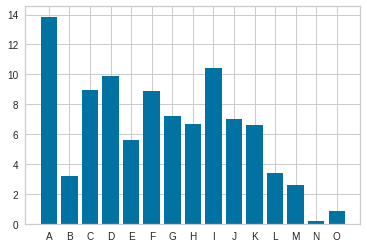

In [ ]:
plt.bar(grouppedby_feeder.index,grouppedby_feeder.EENS)
plt.show()

## 2.0.2 EENS Correlation with Other Variables (Groupped by Feeder)

In [ ]:
grouppedby_feeder.corr()

,RC,DOFDB,STOLP,EENS
RC,1.000000,0.423451,0.959365,0.972955
DOFDB,0.423451,1.000000,0.377912,0.452459
STOLP,0.959365,0.377912,1.000000,0.964076
EENS,0.972955,0.452459,0.964076,1.000000


## 2.0.3 Visualization of Correlation Matrix (Groupped by Feeder)
**Note the high correlations**

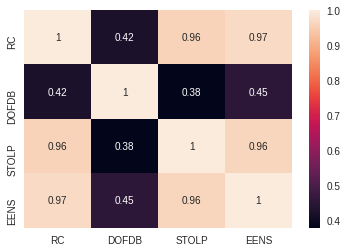

In [ ]:
sns.heatmap(grouppedby_feeder.corr(),annot=True)

## 2.1.0 Grouping by DS (Distribution Station)

In [ ]:
grouppedby_ds = df.groupby('DS').sum().drop('BN',1)
grouppedby_ds.head(5)

,RC,DOFDB,STOLP,EENS
DS,,,,
A,15.967742,1562,1595.0,5.646599
AA,1.258065,159,482.0,0.537920
B,9.802161,2944,1687.0,3.869429
BB,4.500000,569,1238.0,1.303362
C,38.485484,3599,4075.0,7.566067


## 2.1.1 EENS on each DS

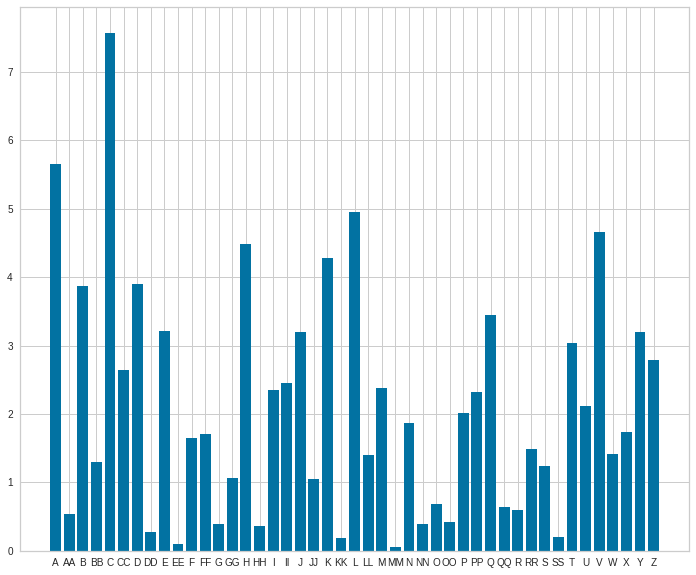

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(grouppedby_ds.index,grouppedby_ds.EENS)
plt.show()

## 2.1.2 EENS Correlation with Other Variables (Groupped by DS)

In [ ]:
grouppedby_ds.corr()

,RC,DOFDB,STOLP,EENS
RC,1.000000,0.014686,0.802548,0.897220
DOFDB,0.014686,1.000000,0.113361,-0.032921
STOLP,0.802548,0.113361,1.000000,0.804795
EENS,0.897220,-0.032921,0.804795,1.000000


## 2.1.3 Visualization of Correlation Matrix (Groupped by DS)
**Note the high correlations**

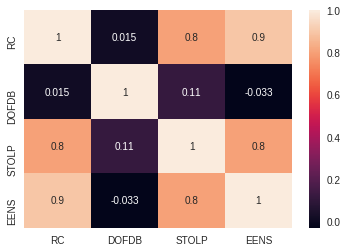

In [ ]:
sns.heatmap(grouppedby_ds.corr(),annot=True)

## 2.2.0 Grouping by AF (affairs)

In [ ]:
grouppedby_af = df.groupby('AF').sum().drop('BN',1)
grouppedby_af.head(5)

,RC,DOFDB,STOLP,EENS
AF,,,,
A,64.733871,5975,6705.0,15.222830
B,22.116129,9810,3965.0,7.172009
C,48.307742,13926,8501.0,11.175919
D,58.736548,13866,10936.0,13.641126
E,19.039677,28225,2909.0,3.746677


## 2.2.1 EENS on each AF

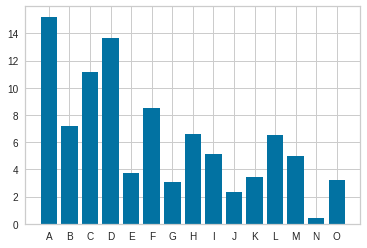

In [ ]:
plt.bar(grouppedby_af.index,grouppedby_af.EENS)
plt.show()

## 2.2.2 EENS Correlation with Other Variables (Groupped by AF)

In [ ]:
grouppedby_af.corr()

,RC,DOFDB,STOLP,EENS
RC,1.000000,0.083857,0.859718,0.946675
DOFDB,0.083857,1.000000,0.203580,0.084985
STOLP,0.859718,0.203580,1.000000,0.902654
EENS,0.946675,0.084985,0.902654,1.000000


## 2.2.3 Visualization of Correlation Matrix (Groupped by AF)
**Note the high correlations**

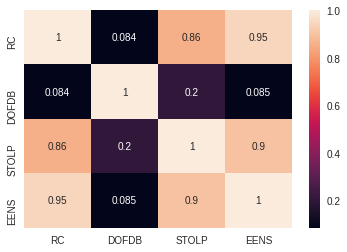

In [ ]:
sns.heatmap(grouppedby_af.corr(),annot=True)

# AF vs Feeder EENS

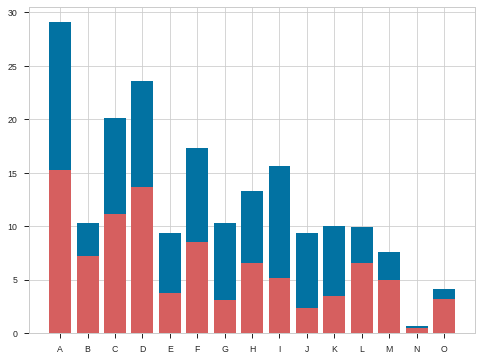

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
ax.bar(grouppedby_af.index, grouppedby_af.EENS,color='r')
ax.bar(grouppedby_feeder.index, grouppedby_feeder.EENS,bottom=grouppedby_af.EENS)
plt.show()

# PCA Explained Variance

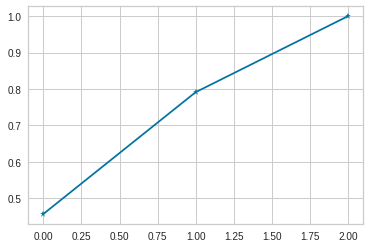

In [5]:
numeric_cols = ['RC','DOFDB','EENS']
num_df = df[numeric_cols]
scaler = StandardScaler()
norm_df = scaler.fit_transform(num_df)
pca = PCA(n_components=len(numeric_cols))
pca.fit(norm_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='*')

# Reconstruction Loss for Different Ks in KMeans

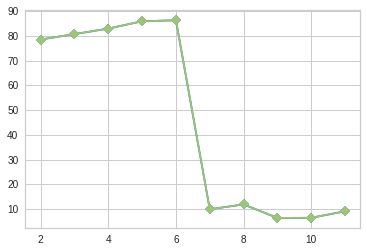

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(norm_df) 
visualizer.draw()